In [109]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
from matplotlib import cm
plt.rcParams.update(newparams)

In [110]:
class BVP(object): 
    def __init__(self, f, g=0, M=10, N=10):
        # right hand side (function)
        self.f = f
        # boundary conditions (function)
        self.g = g
        # Numbr of subdivision along x-axis (total number of points, including boundaries)
        self.M = M
        # Numbr of subdivision along y-axis (total number of points, including boundaries)
        self.N = N
        

In [186]:
def grid(bvp): 
        
    x = np.linspace(0, 1, bvp.M)
    y = np.linspace(0, 1, bvp.N)
    
    # these ones are valid only for this case
    # in general the radius of the smallest inscribed
    # circle should be taken
    h=x[1]-x[0] # x typical space-step
    k=y[1]-y[0] # y typical space-step
    
    # full coorindate array of INTERNAL points
    shape = [len(x[1:-1]), len(y[1:-1])]
    x, y = np.meshgrid(x[1:-1], y[1:-1])

    # reshaping so that I have columnwise vectors
    # with all the x and y coordinates. In practice, THIS passage already
    # re-order the array in a vector that follows the numbering explained
    # in the figure above
    x, y = x.flatten(), y.flatten()
    
    # array with coordinates
    coord = np.zeros((x.size,2))
    coord[:,0]=x
    coord[:,1]=y
    
    return h, k, coord, shape

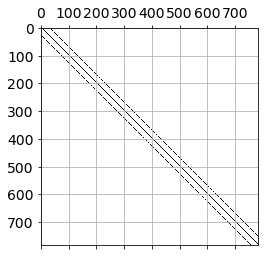

In [218]:
def A_matrix(a,M,N):
    size = (M-2)*(N-2)
    A = np.zeros((size, size))
    A += np.diag((2*a+1)*np.ones(size), 0) # OBS bytt til 2a +1? 
    A += np.diag((-a)*np.ones(size-1), -1)
    A += np.diag((-a)*np.ones(size-1), 1)
    A += np.diag((-1/2)*np.ones(size-(M-1)),M-1)
    A += np.diag((-1/2)*np.ones(size-(M-1)),-(M-1))
    plt.spy(A)
    return A

def u_sol(x,y):
    return x*(1-x)*y*(1-y)

def f(a, x, y):
    return (2*a*y**2 - 2*a*y + 8*x*y + 2*x**2 + 2*y**2 - 6*x -6*y +2 )
M = N = 30
a = 1
ex1 = BVP(f, 0 , M, N)
h, k, coord, shape = grid(ex1)
A = A_matrix(a, M, N)
b = f(a, coord[:,0], coord[:,1])
U = np.linalg.solve(1/h**2 * A, b)
U = np.reshape(U,-1)


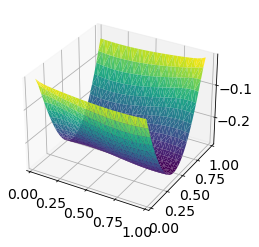

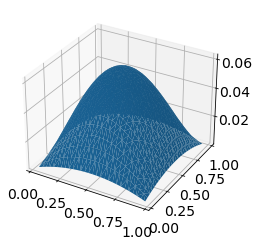

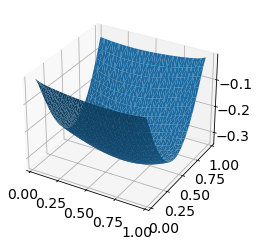

0.3374713165961554


In [219]:
# Plot of the solution
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(coord[:,0], coord[:,1], U, cmap='viridis', edgecolor='none');
plt.show()

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(coord[:,0], coord[:,1], u_sol(coord[:,0], coord[:,1]))
plt.show()

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(coord[:,0], coord[:,1], U - u_sol(coord[:,0], coord[:,1]))
plt.show()

print(np.max(np.abs(U - u_sol(coord[:,0], coord[:,1]))))